In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\User\Desktop\python data science\codeAlpha\Car_price_prediction\car.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.shape

(301, 9)

In [8]:
df.columns=[col.strip().replace(' ','_').lower() for col in df.columns]

In [9]:
df.head()

,car_name,year,selling_price,present_price,driven_kms,fuel_type,selling_type,transmission,owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [13]:
import datetime
current_year = datetime.datetime.now().year
df['car_age'] = current_year - df['year']        # Car age
df['price_diff'] = df['present_price'] - df['selling_price']  # Optional



In [14]:
le = LabelEncoder()
categorical_cols = ['car_name', 'fuel_type', 'selling_type', 'transmission', 'owner']

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.dropna(inplace=True)


In [15]:
X = df[['car_name', 'present_price', 'driven_kms', 'fuel_type', 
        'selling_type', 'transmission', 'owner', 'car_age', 'price_diff']]
y = df['selling_price']


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)


In [17]:
rf = RandomForestRegressor(random_state=42)
params_rf = {
    'n_estimators':[100, 200, 300],
    'max_depth':[None, 10, 20],
    'min_samples_split':[2, 5]
}
grid_rf = GridSearchCV(rf, params_rf, cv=5, scoring='r2')
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)


In [18]:
gbr = GradientBoostingRegressor(random_state=42)
params_gbr = {
    'n_estimators':[100, 200],
    'learning_rate':[0.05, 0.1],
    'max_depth':[3,5]
}
grid_gbr = GridSearchCV(gbr, params_gbr, cv=5, scoring='r2')
grid_gbr.fit(X_train, y_train)

best_gbr = grid_gbr.best_estimator_
y_pred_gbr = best_gbr.predict(X_test)


In [19]:
def evaluate_model(y_test, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} RMSE: {rmse:.2f}")
    print(f"{model_name} R2 Score: {r2:.2f}")

evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gbr, "Gradient Boosting")


Random Forest RMSE: 0.85
Random Forest R2 Score: 0.97
Gradient Boosting RMSE: 0.71
Gradient Boosting R2 Score: 0.98


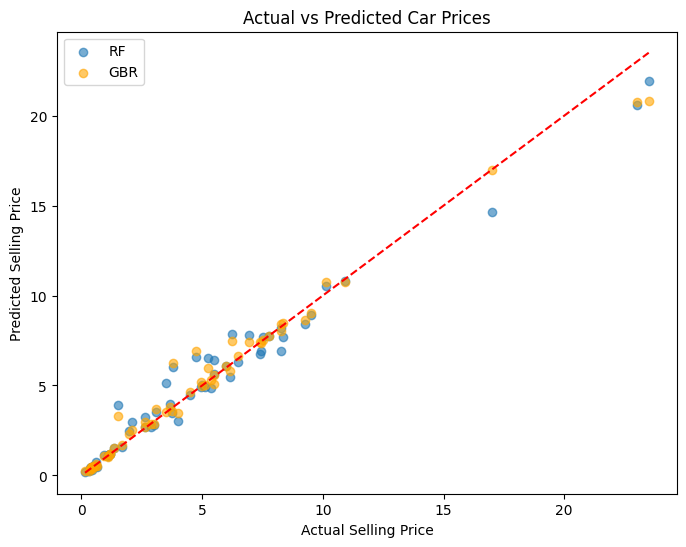

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='RF')
plt.scatter(y_test, y_pred_gbr, alpha=0.6, label='GBR', color='orange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Actual vs Predicted Car Prices")
plt.legend()
plt.show()


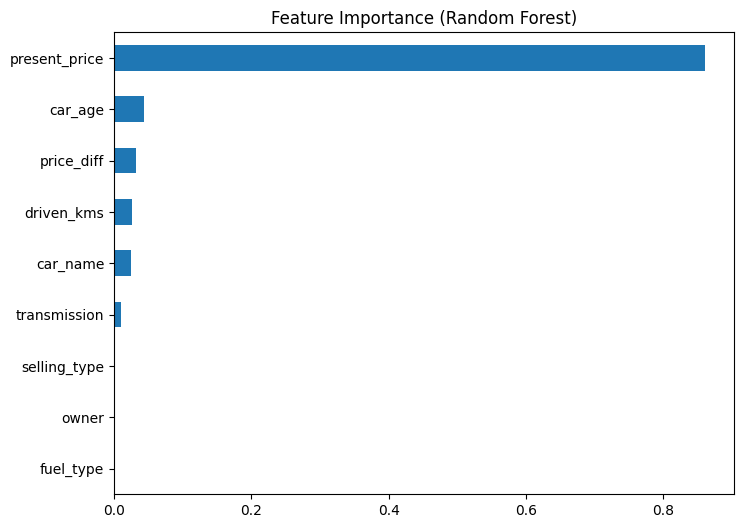

In [21]:
feat_imp = pd.Series(best_rf.feature_importances_, index=X.columns)
feat_imp.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance (Random Forest)")
plt.show()


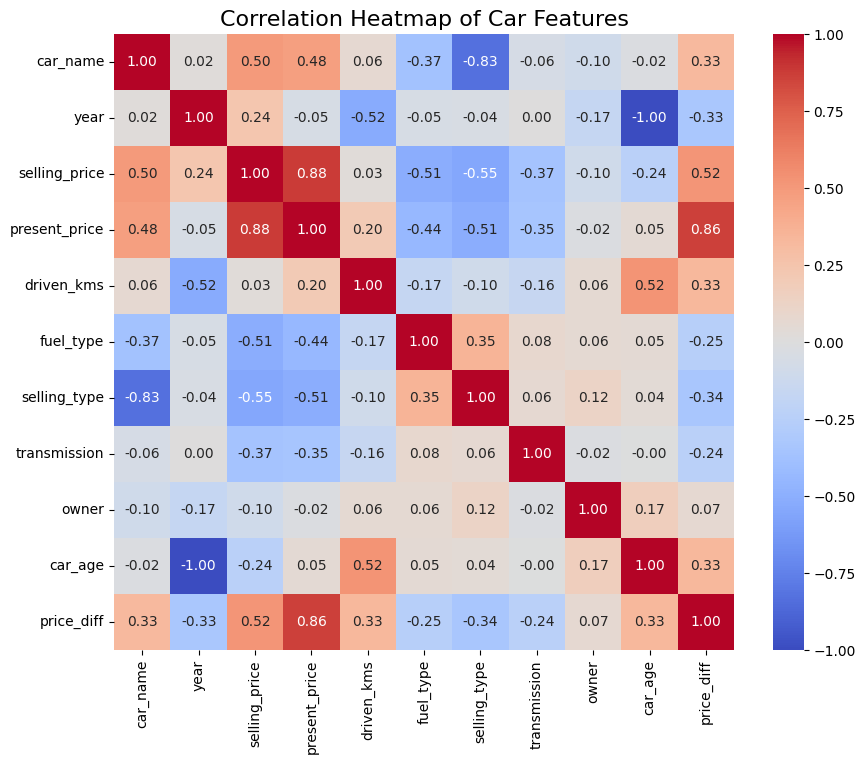

In [22]:
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Car Features", fontsize=16)
plt.show()

Top 5 Features Affecting Price:
 present_price    0.860491
car_age          0.043781
price_diff       0.031678
driven_kms       0.025717
car_name         0.024991
dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_33520\1084125703.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


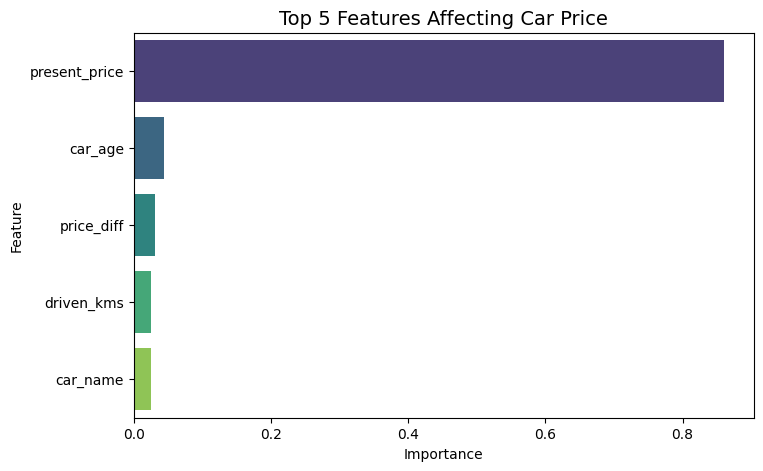

In [23]:
feature_importance = pd.Series(best_rf.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(5)
print("Top 5 Features Affecting Price:\n", top_features)

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")
plt.title("Top 5 Features Affecting Car Price", fontsize=14)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [24]:
import joblib

# Save model
joblib.dump(best_rf, "car_price_predictor_rf.pkl")

# Load model later for prediction
# loaded_model = joblib.load("car_price_predictor_rf.pkl")
# y_new_pred = loaded_model.predict(new_X)


['car_price_predictor_rf.pkl']